# Import lib

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle as pkl

# Read the data

In [73]:
data = pd.read_csv('xdata.csv')
data.head()

,x1_0,x1_1,x1_2,x1_3,x1_4,x1_5,x1_6,x1_7,x1_8,x1_9,...,x2_12,x2_13,x2_14,x2_15,x2_16,x2_17,x2_18,x2_19,x2_20,label
0,473,490,482,475,474,433,409,400,391,409,...,0,0,0,0,0,0,0,0,0,I Love You
1,493,505,492,469,454,449,422,414,408,422,...,0,0,0,0,0,0,0,0,0,I Love You
2,428,445,449,451,452,406,374,357,343,377,...,0,0,0,0,0,0,0,0,0,I Love You
3,364,392,409,421,435,344,325,309,293,311,...,0,0,0,0,0,0,0,0,0,I Love You
4,354,387,406,417,430,342,318,299,283,311,...,0,0,0,0,0,0,0,0,0,I Love You


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10263 entries, 0 to 10262
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1_0    10263 non-null  int64 
 1   x1_1    10263 non-null  int64 
 2   x1_2    10263 non-null  int64 
 3   x1_3    10263 non-null  int64 
 4   x1_4    10263 non-null  int64 
 5   x1_5    10263 non-null  int64 
 6   x1_6    10263 non-null  int64 
 7   x1_7    10263 non-null  int64 
 8   x1_8    10263 non-null  int64 
 9   x1_9    10263 non-null  int64 
 10  x1_10   10263 non-null  int64 
 11  x1_11   10263 non-null  int64 
 12  x1_12   10263 non-null  int64 
 13  x1_13   10263 non-null  int64 
 14  x1_14   10263 non-null  int64 
 15  x1_15   10263 non-null  int64 
 16  x1_16   10263 non-null  int64 
 17  x1_17   10263 non-null  int64 
 18  x1_18   10263 non-null  int64 
 19  x1_19   10263 non-null  int64 
 20  x1_20   10263 non-null  int64 
 21  x2_0    10263 non-null  int64 
 22  x2_1    10263 non-null

# plot the data

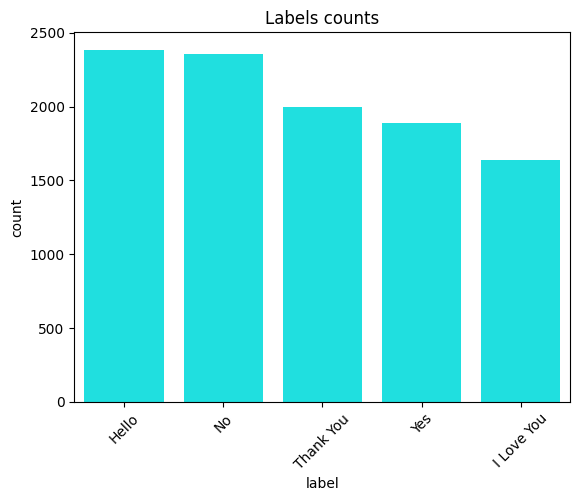

In [75]:
label_counts = data.label.value_counts()
sns.barplot(label_counts, color='cyan')
plt.xticks(rotation=45)
plt.title("Labels counts")
plt.show()


In [76]:
labels=data['label'].unique()
labels

array(['I Love You', 'Thank You', 'Yes', 'No', 'Hello'], dtype=object)

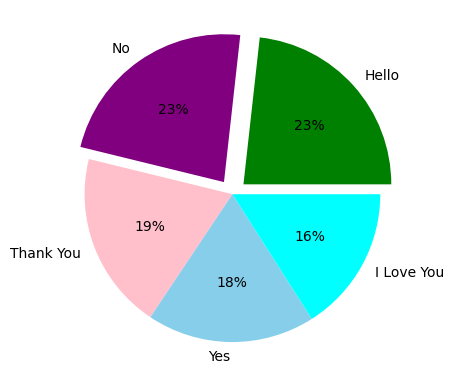

In [77]:
plt.pie(label_counts, labels=['Hello', 'No', 'Thank You', 'Yes', 'I Love You'],
        autopct='%.0f%%', explode=[0.1, 0.1, 0, 0, 0],
        colors=['green', 'purple', 'pink', 'skyblue', 'cyan'])
plt.show()

# Split the data

In [78]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [80]:
forset_model = RandomForestClassifier().fit(x_train, y_train)
print("Model score: {:.2f}%".format(forset_model.score(x_test, y_test) * 100))

Model score: 99.85%


In [81]:
y_pred = forset_model.predict(x_test)

In [82]:
conf_matrics = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,  y_pred))

              precision    recall  f1-score   support

       Hello       1.00      1.00      1.00       480
  I Love You       1.00      0.99      1.00       339
          No       1.00      1.00      1.00       474
   Thank You       1.00      1.00      1.00       397
         Yes       1.00      1.00      1.00       363

    accuracy                           1.00      2053
   macro avg       1.00      1.00      1.00      2053
weighted avg       1.00      1.00      1.00      2053



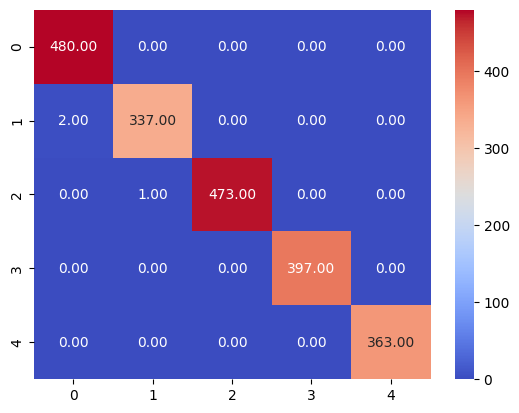

In [83]:
sns.heatmap(conf_matrics, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [84]:
file = open('random_ft.pkl', mode='wb')
pkl.dump(forset_model, file=file)
file.close()